In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

import warnings
warnings.filterwarnings('ignore')

## [DSO] Machine Learning Seminar Vol.10
2020-11-xx  
SKUE

In [2]:
Image(url="https://image.yodobashi.com/product/100/000/009/002/935/105/100000009002935105_10204.jpg")

# クラスタ分析 - ラベルなしデータの分析

## k-means法を使った類似度によるオブジェクトのグループ化

### scikit-learnを使ったk-meansクラスタリング
+ 階層的クラスタリング
+ 密度ベース
  + セントロイド
  + メドイド

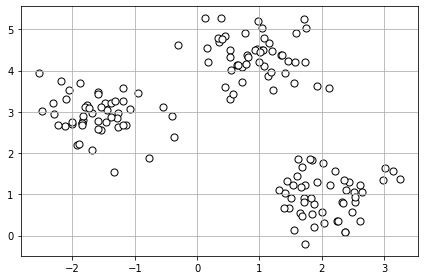

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=150,
                                 n_features=2,
                                 centers=3,
                                 cluster_std=0.5,
                                 shuffle=True,
                                 random_state=0)

plt.scatter(X[:,0], X[:,1], c='white', marker='o',
                   edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

+ クラスタリングの距離
 + ユークリッド距離の2乗
 $$d(x,y)^2 = \sum_{j=1}^{m}(x_j - y_j)^2 = \| x - y \|_{2}^2$$
   + クラスタ内誤差平方和（クラスタの慣性）
   $$SSE =\sum_{i=1}^n \sum_{j=1}^k w^{(i, j)} \| x^{(i)} - \mu^{(j)} \|_{2}^{2}$$

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
                        init='random',
                        max_iter=300,
                        tol=1e-04,
                        random_state=0)
y_km = km.fit_predict(X)

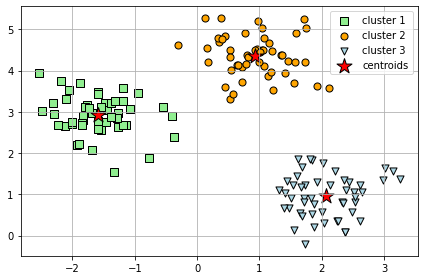

In [9]:
plt.scatter(X[y_km==0,0],
                   X[y_km==0,1],
                   s=50,
                   c='lightgreen',
                   edgecolor='black',
                   marker='s',
                   label='cluster 1')
plt.scatter(X[y_km==1,0],
                    X[y_km==1,1],
                    s=50,
                    c='orange',
                    edgecolor='black',
                    marker='o',
                    label='cluster 2')
plt.scatter(X[y_km==2,0],
                   X[y_km==2,1],
                   s=50,
                   c='lightblue',
                   edgecolor='black',
                   marker='v',
                   label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],
                    km.cluster_centers_[:,1],
                    s=250,
                    marker='*',
                    c='red',
                    edgecolor='black',
                    label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

## k-means++法を使ってセントロイドの初期値をよりスマートに設定する

## ハードクラスタリングとソフトクラスタリング
+ ハードクラスタリング
+ ソフトクラスタリング（ファジークラスタリング）
 + Fuzzy C-means
 + Soft k-means/Fuzzy k-means

## エルボー法を使ってクラスタの最適な個数を求める

In [11]:
# クラスタ内残差平方和
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


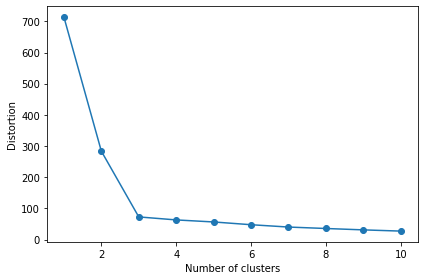

In [12]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                            init='k-means++',
                            n_init=10,
                            max_iter=300,
                            random_state=0)

    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## シルエット図を使ってクラスタリングの性能を数値化する
+ シルエット係数
 + クラスタの凝縮度の計算
 + クラスタからの乖離度の計算
 + シルエット係数の計算

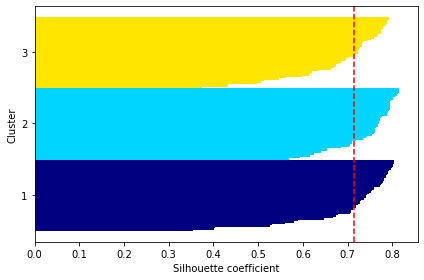

In [14]:
km = KMeans(n_clusters=3,
                        init='k-means++',
                        n_init=10,
                        max_iter=300,
                        tol=1e-04,
                        random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# シルエット係数を計算
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0

yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

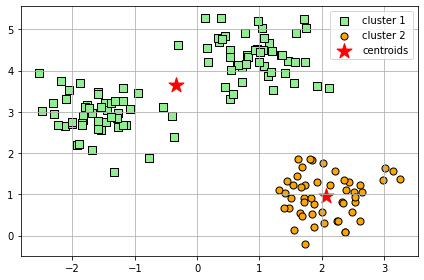

In [17]:
km = KMeans(n_clusters=2,
                        init='k-means++',
                        n_init=10,
                        max_iter=300,
                        tol=1e-04,
                        random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km ==0, 0],
                    X[y_km==0,1],
                    s=50,
                    c='lightgreen',
                    edgecolor='black',
                    marker='s',
                    label='cluster 1')
plt.scatter(X[y_km==1, 0],
                    X[y_km==1, 1],
                    s=50,
                    c='orange',
                    edgecolor='black',
                    marker='o',
                    label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],
                    km.cluster_centers_[:,1],
                    s=250,
                    marker='*',
                    c='red',
                    label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

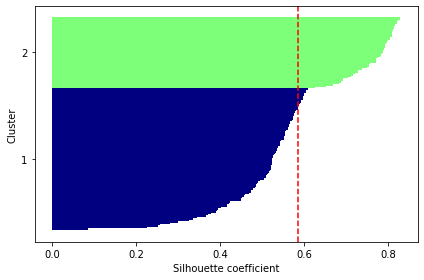

In [24]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/ n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()